In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns
from sklearn.decomposition import PCA
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


# Exploretory Data analysis

<AxesSubplot:xlabel='target', ylabel='count'>

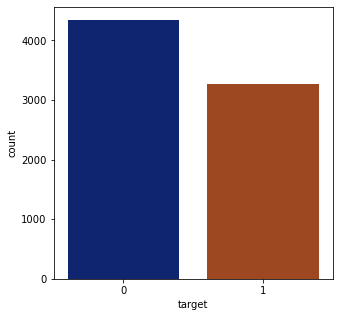

In [4]:
# for train dataset
plt.figure(figsize = (5, 5))
sns.countplot(x = 'target', data = train, palette = 'dark', linewidth = 5)

<AxesSubplot:ylabel='target'>

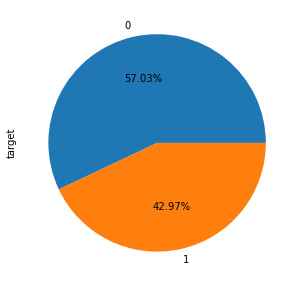

In [5]:
piedata = train['target']
plt.figure(figsize=(5, 5))
piedata.value_counts().plot(kind = 'pie', autopct = '%.2f%%')

Text(0.5, 1.0, 'Count of keywords')

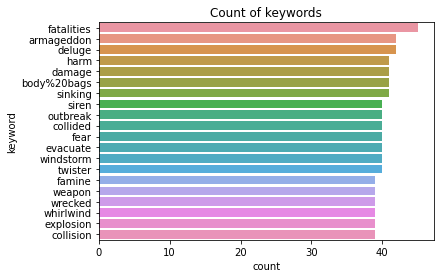

In [6]:
# for train dataset
sns.countplot(y = train.keyword, order = train['keyword'].value_counts().sort_values(ascending = False).iloc[:20].index)
plt.title('Count of keywords')

Text(0.5, 1.0, 'Count of keywords')

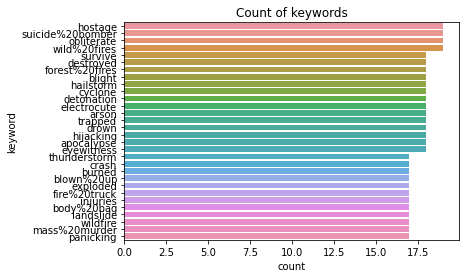

In [7]:
# for test dataset
sns.countplot(y = test.keyword, order = test['keyword'].value_counts().sort_values(ascending = False).iloc[20:50].index)
plt.title('Count of keywords')

# Data cleaning for train dataset

Decontraction

In [8]:
def decontraction(text):
    text = re.sub(r'won\'t', 'will not', text)
    text = re.sub(r'can\'t', 'can not', text)
    text = re.sub(r'n\'t', 'not', text)
    text = re.sub(r'\'re', ' are', text)
    text = re.sub(r'\'s', ' is', text)
    text = re.sub(r'\'d', ' would', text)
    text = re.sub(r'\'ll', ' will', text)
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub(r'\'ve', ' have', text)
    text = re.sub(r'\'m', ' am', text)
    text = re.sub('\n', ' ', text)
    return text

train['decon_text'] = train['text'].apply(lambda x : decontraction(x))

Remove stopwords, apply steaming 

In [9]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
from nltk.stem import PorterStemmer, WordNetLemmatizer
lm = WordNetLemmatizer()
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
corpus = []
for i in range(0, len(train.text)):
    tweet = re.sub('[^a-zA-Z]' ,' ', train['decon_text'][i])
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in stopword]
    tweet = ' '.join(tweet)
    corpus.append(tweet)
    
print(corpus)

['deed reason earthquak may allah forgiv us', 'forest fire near la rong sask canada', 'resid ask ishelt place notifi offic evacu shelter place order expect', 'peopl receiv wildfir evacu order california', 'got sent photo rubi alaska smoke wildfir pour school', 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir', 'flood disast heavi rain caus flash flood street manit colorado spring area', 'top hill see fire wood', 'emerg evacu happen build across street', 'afraid tornado come area', 'three peopl die heat wave far', 'haha south tampa get flood hah wait second live south tampa gonna gonna fvck flood', 'rain flood florida tampabay tampa day lost count', 'flood bago myanmar arriv bago', 'damag school bu multi car crash break', 'man', 'love fruit', 'summer love', 'car fast', 'goooooooaaaaaal', 'ridicul', 'london cool', 'love ski', 'wonder day', 'looooool', 'way eat shit', 'nyc last week', 'love girlfriend', 'cooool', 'like pasta', 'end', 'bbcmtd wholesal market a

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tf = TfidfVectorizer()
tf.fit(corpus)
y = train.iloc[:, 4:5].values

In [12]:
X_tf = tf.transform(corpus).toarray()

In [13]:
X_tf.shape

(7613, 13083)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X_tf,y , test_size = 0.2, random_state = 42)

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
y_test = y_test.flatten() 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [16]:
from sklearn.metrics import f1_score, accuracy_score
print(f1_score(pred, y_test))
print(accuracy_score(pred, y_test))

0.7332185886402754
0.7964543663821405


In [17]:
test_tweet = test['text']
test_X = tf.transform(test_tweet).todense()

In [18]:
test_X.shape

(3263, 13083)

In [19]:
X_tf.shape

(7613, 13083)

In [20]:
test_pred = lr.predict(test_X)

In [21]:
df = pd.DataFrame({'id' : test.id, 'target' : test_pred})
df

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [22]:
df.to_csv('submission.csv', index = False)

In [23]:
submission = pd.read_csv('./submission.csv')
submission

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0
